# Worksheet 2

#### Submission:
Please **restart the kernel and run all**, then download a pdf file (file -> print preview -> save as pdf), and submit your worksheet (pdf version) to Gradescope. 

## Part 1: Concatenate vs merge

Read documentations [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html), then use your own words (one or two lines) to state the differences. 


pandas.concat() is used to concatenate data frames along a specified axis, ie along the rows or the columns of the data frame, and essentially stacks the data frames on top of eachother or next to each other. Based on the index it performs an outer or inner join. pandas.merge() is used to combine data frames based on a common column or index, and can perform an inner, outer,left, or right join. 

## Part 2: Combine two dataframes to one

Given the following temperature datasets, merge them to a large dataframe

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [1]:
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt
import numpy as np

df_1900 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df_2000 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df1 = pd.concat([df_1900, df_2000], axis = 0, ignore_index = True)
df1.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


## Part 3

Write a function, which takes two dataframes as inputs and returns a new dataframe, to do data manipulation.

Inputs:

- `df1: temperature data.`
- `df2: country-code data.` This is the same dataframe I use during the lecture, which can be found here: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

Outputs:
- `df3: a new dataframe including several columns (see example below)` 

Your function should work for the dataframes I provide above. The desired output looks like

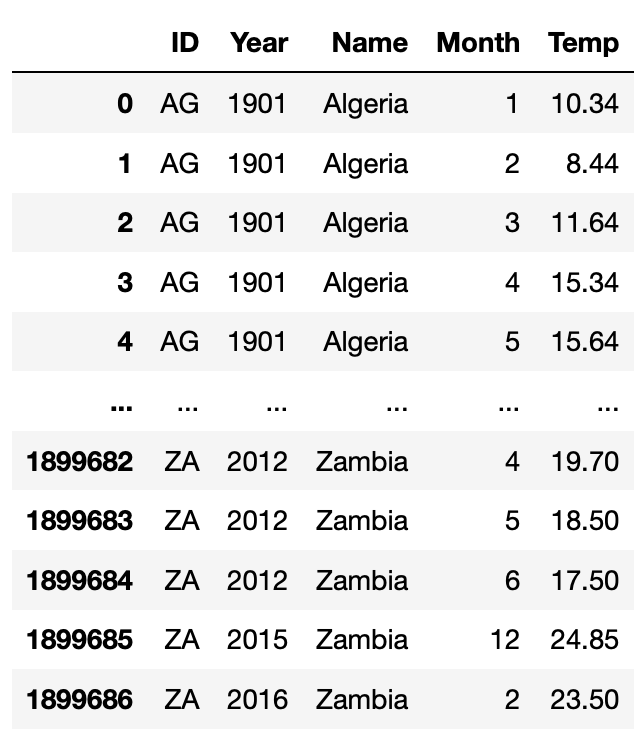

#### Documentation and test example:
- You should add docstrings for your function. In addition, inline comments are also required to explain your codes. 

- Test your function on the temperature data from part 2 and the country code data I provide. The expected output is given in the plot.

In [2]:
df_1900 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df_2000 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df1 = pd.concat([df_1900, df_2000], axis = 0, ignore_index = True)

df2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv')

def merge(df1,df2):
    df1["FIPS 10-4"] = df1["ID"].str[0:2]

    df3 = pd.merge(df1, df2, on = ["FIPS 10-4"])

    columns_to_divide = ['VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 'VALUE5', 
                     'VALUE6', 'VALUE7', 'VALUE8', 'VALUE9', 'VALUE10', 
                     'VALUE11', 'VALUE12']
    df3[columns_to_divide] = df3[columns_to_divide] / 100
    df3 = df3.drop(["FIPS 10-4", "ISO 3166"], axis = 1)
    df3 = df3.set_index(keys=["ID", "Year", "Name"])
    df3 = df3.stack()
    df3 = df3.reset_index()
    df3 = df3.rename(columns = {"level_3"  : "Month" , 0 : "Temp)"})
    df3["Month"] = df3["Month"].str[5:].astype(int)
    return df3

df_merged = merge(df1,df2)
df_merged

,ID,Year,Name,Month,Temp)
0,AG000060390,1901,Algeria,1,10.34
1,AG000060390,1901,Algeria,2,8.44
2,AG000060390,1901,Algeria,3,11.64
3,AG000060390,1901,Algeria,4,15.34
4,AG000060390,1901,Algeria,5,15.64
...,...,...,...,...,...
1899682,ZAM00067663,2012,Zambia,4,19.70
1899683,ZAM00067663,2012,Zambia,5,18.50
1899684,ZAM00067663,2012,Zambia,6,17.50
1899685,ZAM00067663,2015,Zambia,12,24.85
